In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings

from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
def summerize_data(df):
    for column in df.columns:
        print (column)
        if df.dtypes[column] == np.object: # Categorical data
            print (df[column].value_counts())
        else:
            print (df[column].describe()) 
            
        print ('\n')
    
summerize_data(df)

age
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


fnlwgt
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6t

CLASIFFIER

In [ ]:
#menggabungkan function Simple Imputer, Binary Encoder
pipe = Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='NC')),('binary encoder',ce.BinaryEncoder())
])


In [ ]:
transformer = ColumnTransformer([('ohe', OneHotEncoder(drop = 'first'),['relationship','race','sex']),
                                 ('binary encoder',pipe,['workclass','marital.status', 'occupation','native.country'])
                                 ],remainder = 'passthrough')
#remainder passthrough yang ga masuk column transformer dibiarin aja


DATA SPLITTING

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
X = df.drop(columns=['fnlwgt','education','income'])
X

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [ ]:
y = np.where(df['income']=='>50K',1,0) # 1== =>50K
y

array([0, 0, 0, ..., 1, 0, 0])

Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3, 
    random_state = 10) 

In [ ]:
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
17863,68,Self-emp-not-inc,10,Divorced,Transport-moving,Not-in-family,White,Female,0,0,20,United-States
22456,44,Private,10,Separated,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States
8952,56,Private,7,Separated,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States
28830,44,?,9,Never-married,?,Unmarried,Black,Female,0,0,40,United-States
17063,48,Self-emp-inc,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,25,United-States


Preprocessing

In [ ]:
X_train_preprocessing = transformer.fit_transform(X_train)
X_test_preprocessing = transformer.transform(X_test)

In [ ]:
X_train_preprocessing = pd.DataFrame(X_train_preprocessing)
X_train_preprocessing 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68.0,10.0,0.0,0.0,20.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0,10.0,0.0,0.0,40.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56.0,7.0,0.0,0.0,40.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0,9.0,0.0,0.0,40.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,13.0,0.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
22788,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,12.0,0.0,0.0,16.0
22789,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
22790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


In [ ]:
X_test_preprocessing = pd.DataFrame(X_test_preprocessing)
X_test_preprocessing

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,10.0,0.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0,14.0,0.0,0.0,35.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,13.0,0.0,0.0,40.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54.0,9.0,0.0,0.0,15.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56.0,8.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,10.0,0.0,0.0,65.0
9765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,9.0,0.0,0.0,50.0
9766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,66.0,13.0,5556.0,0.0,26.0
9767,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,13.0,8614.0,0.0,40.0


MERUBAH NAMA KOLOM

In [ ]:
transformer.transformers_

[('ohe',
  OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['relationship', 'race', 'sex']),
 ('binary encoder', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value='NC',
                                 missing_values=nan, strategy='constant',
                                 verbose=0)),
                  ('binary encoder',
                   BinaryEncoder(cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 mapping=None, return_df=True, verbose=0))],
           verbose=False), ['workclass',
   'marital.status',
   'occupation',
   'native.country']),
 ('remainder', 'passthrough', [0, 2, 8, 9, 10])]

In [ ]:
#Binary Encoder
transformer.transformers_[0][1].get_feature_names()

array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black',
       'x1_Other', 'x1_White', 'x2_Male'], dtype=object)

Notes : pd.get_dummies = one hot encoder

In [ ]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['binary encoder'].get_feature_names() + ['age','education.num','capital.gain','capital.loss','hours.per.week']
X_train_preprocessing.columns = features
X_test_preprocessing.columns = features
X_train_preprocessing

,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Asian-Pac-Islander,x1_Black,x1_Other,x1_White,x2_Male,0_0,0_1,0_2,0_3,0_4,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,2_4,3_0,3_1,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68.0,10.0,0.0,0.0,20.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0,10.0,0.0,0.0,40.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56.0,7.0,0.0,0.0,40.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0,9.0,0.0,0.0,40.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,13.0,0.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
22788,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,12.0,0.0,0.0,16.0
22789,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
22790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


In [ ]:
X_test_preprocessing.shape

(9769, 36)

MODELLING

1. Deccission Tree

In [ ]:
dt = DecisionTreeClassifier(criterion= 'entropy',max_depth= 3)
dt.fit(X_train_preprocessing,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test_preprocessing)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7417
           1       0.73      0.51      0.60      2352

    accuracy                           0.84      9769
   macro avg       0.80      0.73      0.75      9769
weighted avg       0.83      0.84      0.83      9769



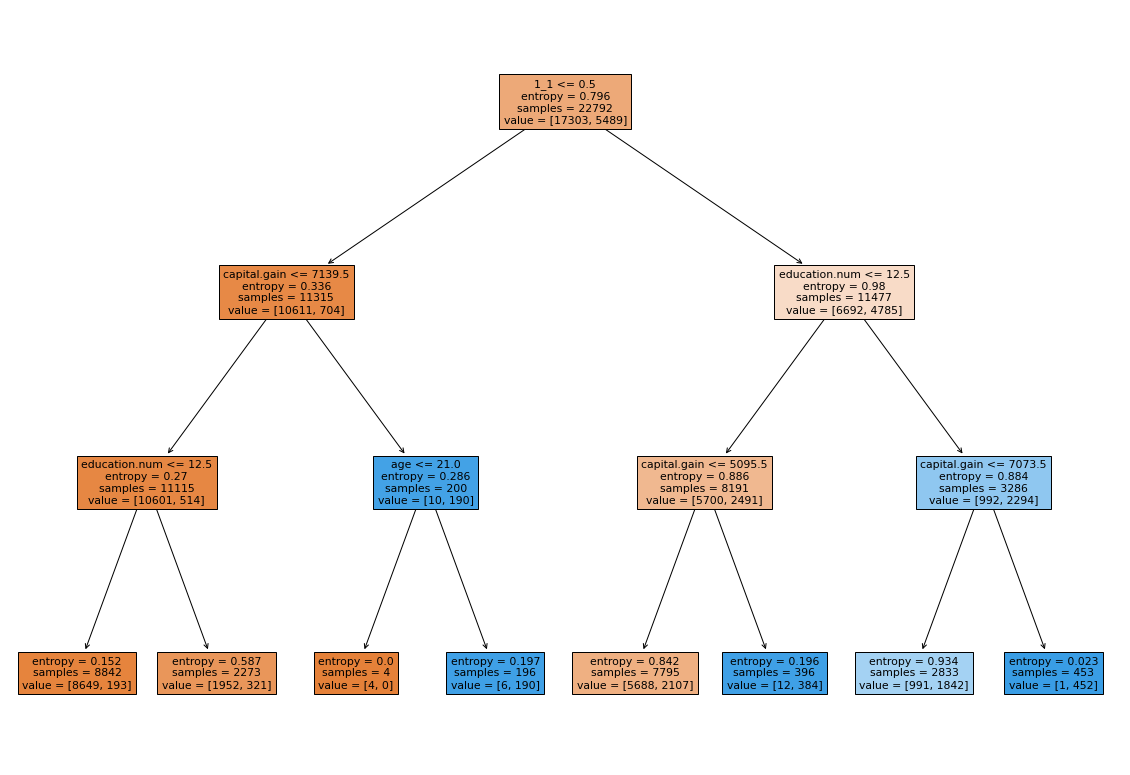

In [ ]:
plt.figure(figsize= (20,14))
plot_tree(dt,feature_names=features,filled=True)
plt.show()

Adabossting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adab = AdaBoostClassifier(dt,n_estimators= 200, learning_rate=0.1,random_state=2021)
adab = adab.fit(X_train_preprocessing,y_train)
y_pred = adab.predict(X_test_preprocessing)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7417
           1       0.78      0.62      0.69      2352

    accuracy                           0.87      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769



In [ ]:
importance_table = pd.DataFrame({'imp' : adab.feature_importances_},index=features)
importance_table

,imp
x0_Not-in-family,0.009683
x0_Other-relative,0.008809
x0_Own-child,0.015288
x0_Unmarried,0.014113
x0_Wife,0.025294
x1_Asian-Pac-Islander,0.008982
x1_Black,0.006709
x1_Other,0.003387
x1_White,0.004049
x2_Male,0.026851


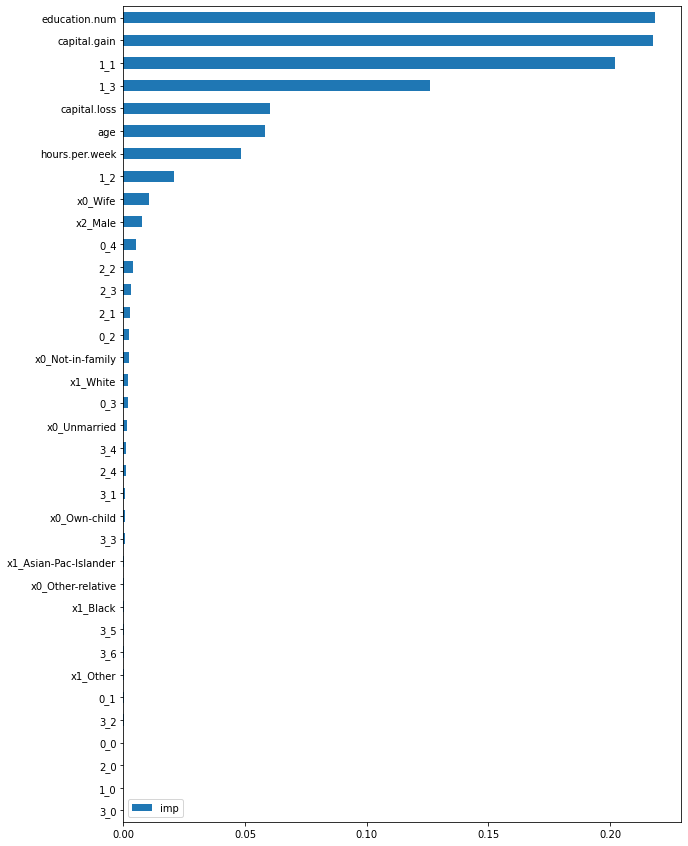

In [ ]:
importance_table.sort_values(by='imp').plot(kind='barh',figsize=(10,15))

gbc : gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(max_depth=3,n_estimators=200, learning_rate= 0.1)
gbc = gbc.fit(X_train_preprocessing,y_train)
y_pred = gbc.predict(X_test_preprocessing)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7417
           1       0.78      0.61      0.69      2352

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [ ]:
importance_table = pd.DataFrame({'imp' : gbc.feature_importances_},index=features)
importance_table

,imp
x0_Not-in-family,0.002102
x0_Other-relative,0.000262
x0_Own-child,0.000590
x0_Unmarried,0.001655
x0_Wife,0.010327
x1_Asian-Pac-Islander,0.000272
x1_Black,0.000241
x1_Other,0.000114
x1_White,0.001919
x2_Male,0.007827


xgb :extreme gradient boosting

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators= 200, learning_rate=0.1,random_state=2021)
xgb = xgb.fit(X_train_preprocessing,y_train)
y_pred = xgb.predict(X_test_preprocessing)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7417
           1       0.78      0.61      0.69      2352

    accuracy                           0.87      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769



In [ ]:
importance_table_3 = pd.DataFrame({'imp' : xgb.feature_importances_},index=features)
importance_table_3

,imp
x0_Not-in-family,0.015089
x0_Other-relative,0.004940
x0_Own-child,0.009637
x0_Unmarried,0.007722
x0_Wife,0.012604
x1_Asian-Pac-Islander,0.003423
x1_Black,0.003734
x1_Other,0.001646
x1_White,0.008107
x2_Male,0.011630


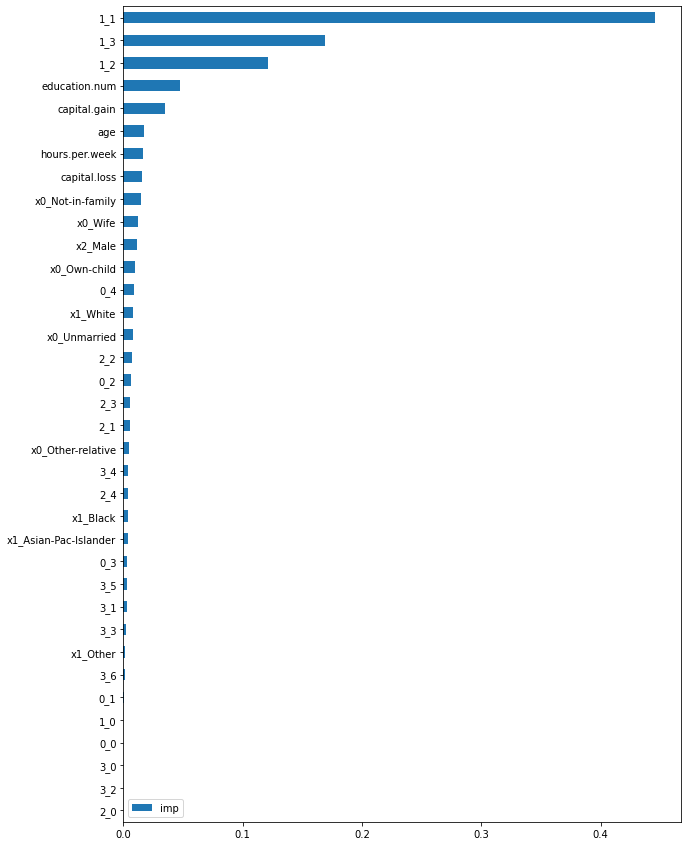

In [ ]:
importance_table_3.sort_values(by='imp').plot(kind='barh',figsize=(10,15))

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_val_score

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=3)
model_ada = AdaBoostClassifier(model_tree, n_estimators=200, learning_rate= 0.1, random_state=2021)
model_gbc = GradientBoostingClassifier(max_depth=3,n_estimators=200, learning_rate= 0.1, random_state=2021)
model_xgb = XGBClassifier(max_depth=3,n_estimators=200, learning_rate= 0.1, random_state=2021)
estimator = Pipeline([('clf',dt)])
hyperparam = {'clf': [model_tree,model_ada,model_gbc,model_xgb]}
skfold = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator, param_grid=hyperparam, cv=skfold, scoring='f1',n_jobs=-1)

In [ ]:
grid_search.fit(X_train_preprocessing,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='entropy',
                                                               max_depth=3,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                    

In [ ]:
grid_search.best_score_

0.7015316689841404

In [ ]:
grid_search.best_params_

{'clf': AdaBoostClassifier(algorithm='SAMME.R',
                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                          class_weight=None,
                                                          criterion='gini',
                                                          max_depth=3,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
                                                          presort='deprecated',
      

In [ ]:
grid_search.best_estimator_.fit(X_train_preprocessing,y_train)

Pipeline(memory=None,
         steps=[('clf',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                          class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=3,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                                                                          min_samples_leaf=1,
                                                      

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test_preprocessing)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7417
           1       0.78      0.63      0.69      2352

    accuracy                           0.87      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

